In [37]:
import pandas as pd
import glob

all_average_results = glob.glob('../indexing/results/*/average_results.csv')

In [38]:
# concatenate all average results into one dataframe, set name as name of directory
all_average_results_df = []
for average_results in all_average_results:
    df = pd.read_csv(average_results)
    df['judgement'] = df['name'].str.split('_').str[0]
    df['name'] = average_results.split('/')[3]
    all_average_results_df.append(df)
all_average_results_df = pd.concat(all_average_results_df)

In [39]:

all_average_results_df

,name,map,bpref,ndcg_cut_10,judgement
0,QE_tfidf,0.328905,0.430822,0.528759,qrels
1,QE_tfidf,0.492266,0.676894,0.605469,qcred
2,QE_tfidf,0.394445,0.452956,0.691979,qread
0,colbert_v1,0.480183,0.445532,0.632888,qrels
1,colbert_v1,0.774768,0.730597,0.625598,qcred
2,colbert_v1,0.649825,0.509974,0.774053,qread
0,QE_dph,0.357313,0.447128,0.569338,qrels
1,QE_dph,0.505827,0.679313,0.623856,qcred
2,QE_dph,0.403736,0.452294,0.722833,qread
0,colbert_v2,0.330816,0.346085,0.649604,qrels


In [40]:
order = ['QE_tfidf', 'QE_dph', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed', 'monoT5', 'monoT5+duoT5']

all_average_results_df['name'] = pd.Categorical(all_average_results_df['name'], order)
all_average_results_df = all_average_results_df.sort_values('name')
all_average_results_df = all_average_results_df.reset_index(drop=True)
all_average_results_df

,name,map,bpref,ndcg_cut_10,judgement
0,QE_tfidf,0.328905,0.430822,0.528759,qrels
1,QE_tfidf,0.492266,0.676894,0.605469,qcred
2,QE_tfidf,0.394445,0.452956,0.691979,qread
3,QE_dph,0.357313,0.447128,0.569338,qrels
4,QE_dph,0.505827,0.679313,0.623856,qcred
5,QE_dph,0.403736,0.452294,0.722833,qread
6,colbert_v1,0.480183,0.445532,0.632888,qrels
7,colbert_v1,0.774768,0.730597,0.625598,qcred
8,colbert_v1,0.649825,0.509974,0.774053,qread
9,colbert_v2,0.407758,0.379656,0.799140,qread


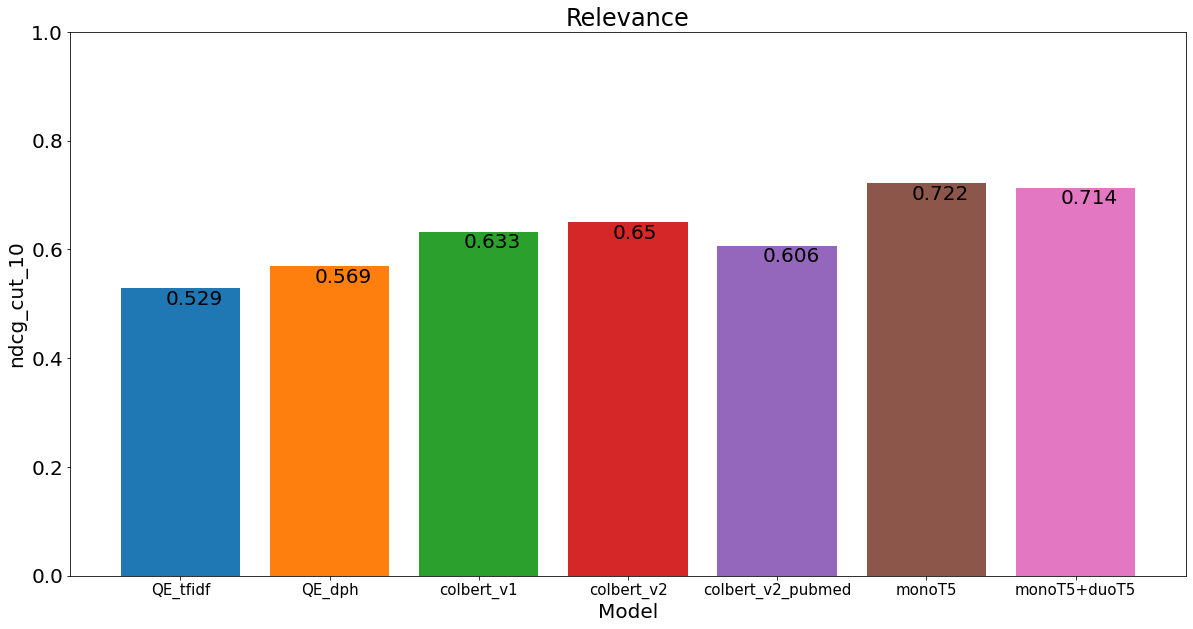

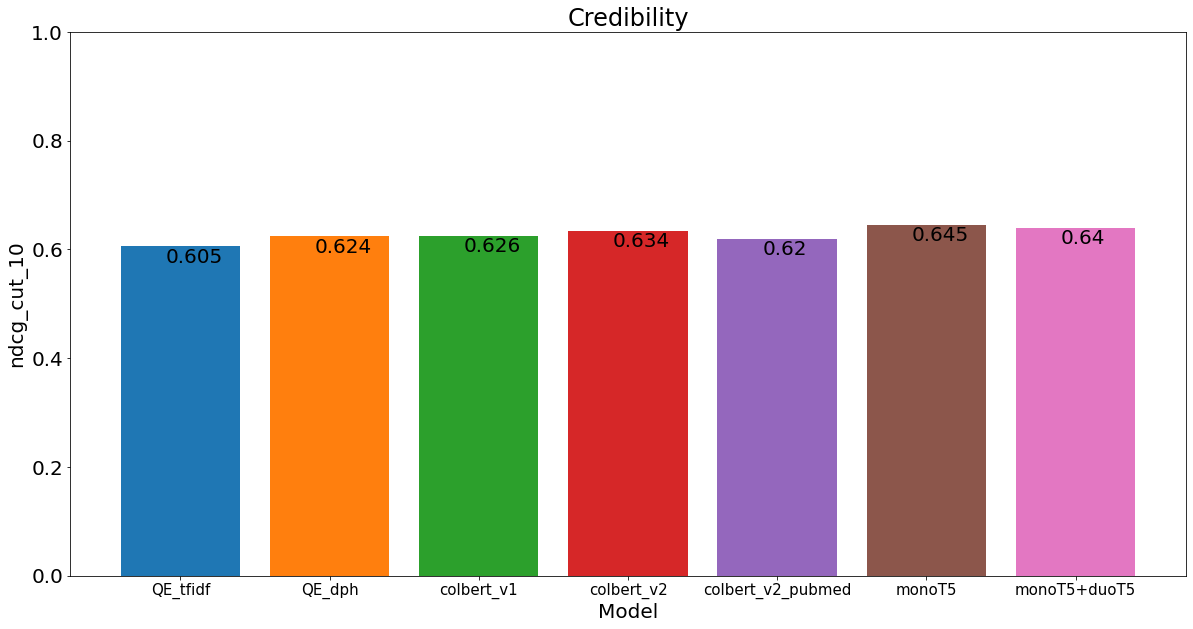

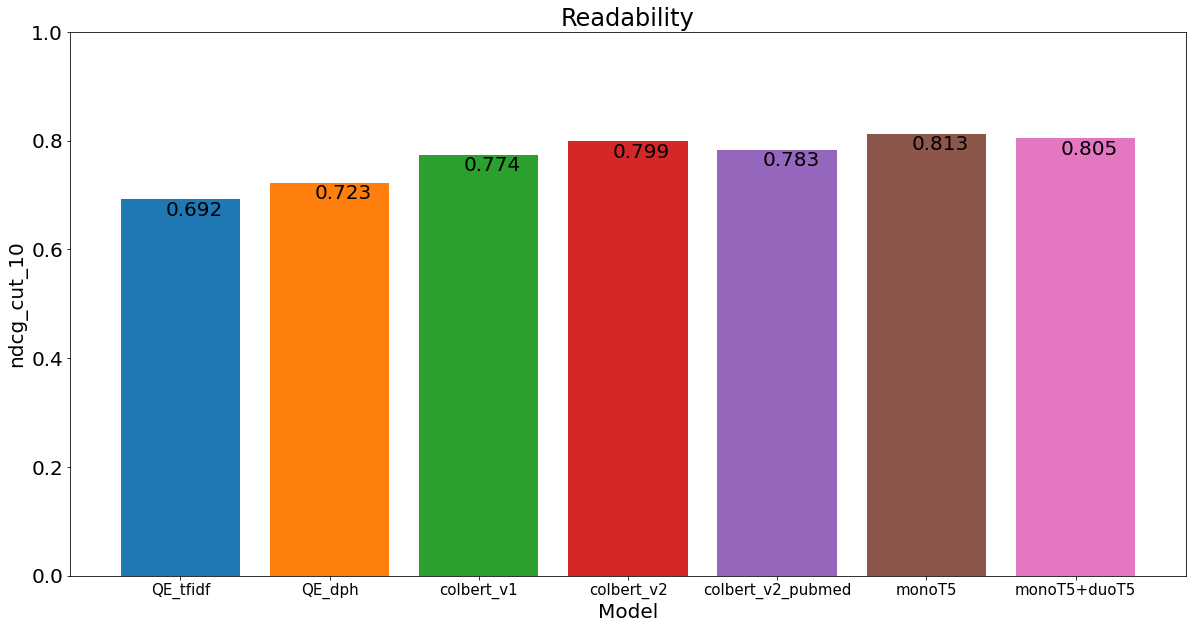

In [41]:
import matplotlib.pyplot as plt

judgements = ['qrels', 'qcred', 'qread']
titles = ['Relevance', 'Credibility', 'Readability']

# for each name, filter df at column 'name' and plot
for judge in judgements:
    vis_df = all_average_results_df.loc[all_average_results_df['judgement'] == judge]
    # plot name and nDCG@10 as bar plot
    # add exact value above each bar
    # different color for each bar
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
    # increase figure size
    plt.figure(figsize=(20, 10))
    plt.bar(vis_df['name'], vis_df['ndcg_cut_10'], color=colors)
    for i, v in enumerate(vis_df['ndcg_cut_10']):
        plt.text(i-0.1, v-0.03, str(round(v, 3)))
    
    # increase font size for all text
    plt.rcParams.update({'font.size': 20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=20)

    plt.ylabel('ndcg_cut_10')
    plt.xlabel('Model')
    plt.ylim(0.0, 1.0)
    plt.title(titles[judgements.index(judge)])
    plt.show()